In [30]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library

import typing

In [40]:
virus_df = pd.read_csv("virus_hw2.csv")

In [41]:
virus_df.head(3)

,PatientID,Address,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,...,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,TestResultsCode
0,0,8520 Dougherty Common Apt. 318\nLake Annamouth...,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,...,0.561232,-0.679339,0.100034,0.727264,NaN,-0.471150,-1.353009,-0.535733,-1.572741,flue_Spreader_NotatRisk
1,1,"9338 Griffin Route\nThorntonshire, WY 36917",NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,...,NaN,-1.586196,NaN,-0.355124,-0.347716,-0.382849,-0.794809,-0.531691,-6.764451,measles_NotSpreader_NotatRisk
2,2,"8350 Adam Streets\nLake Angelaberg, MS 13029",NaN,270.970619,562.33635,1151.389973,NaN,NaN,NaN,NaN,...,0.743885,0.351076,-1.977511,-1.234402,0.258255,1.271829,-0.595020,2.789755,1.646610,not_detected_NotSpreader_atRisk


**Splitting the data**

In [82]:
train_ds_part = 0.75
valid_ds_part = 0.15
test_ds_part = 0.10

total_ds_rows_n = virus_df.shape[0]

train_ds_part_int = round(total_ds_rows_n * train_ds_part)
valid_ds_part_int = round(total_ds_rows_n * valid_ds_part)
test_ds_part_int = total_ds_rows_n - valid_ds_part_int - train_ds_part_int


train_end_idx = train_ds_part_int
valid_end_idx = train_ds_part_int+valid_ds_part_int

split_data = np.split(virus_df, [train_end_idx, valid_end_idx], axis=0)

print(f"Total size: {total_ds_rows_n}\n\
Train df: {split_data[0].shape[0]}\n\
Valid df: {split_data[1].shape[0]}\n\
Test df: {split_data[2].shape[0]}")

ds_obj = {}

ds_obj["train"] = split_data[0]
ds_obj["train_original"] = split_data[0]

ds_obj["valid"] = split_data[1]
ds_obj["valid_original"] = split_data[1]

ds_obj["test"] = split_data[2]
ds_obj["test_original"] = split_data[2]


Total size: 5000
Train df: 3750
Valid df: 750
Test df: 500


**Analyzing the correct type for each attribute**

In [32]:
virus_df.describe()

,PatientID,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,DisciplineScore,...,pcrResult15,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9
count,5000.000000,3987.000000,3970.000000,3989.000000,3968.000000,4036.000000,756.000000,750.000000,3983.000000,3975.000000,...,3976.000000,4033.000000,4017.000000,3994.000000,3971.000000,3967.000000,4007.000000,3997.000000,3994.000000,4013.000000
mean,2499.500000,3.381991,549.405928,1098.928489,1132.226045,96.815596,317.470895,181.863769,31.487374,5.294088,...,-1.149372,1.825813,-1.761865,-2.344378,0.089435,-0.008925,0.478526,-1.675647,0.003504,1.574187
std,1443.520003,1.288455,153.996262,307.480015,308.366982,53.501290,1377.813535,106.141554,26.035730,4.512556,...,75.038751,1.511126,149.316939,4.982812,1.237787,0.695519,59.962162,122.569795,1.321364,181.560410
min,0.000000,0.000000,111.094470,261.258274,151.752961,3.454840,0.000000,0.381134,13.743743,0.000000,...,-1705.948613,0.095814,-8244.852556,-23.531311,-4.488706,-2.069859,-1210.476970,-1778.165094,-3.827445,-7277.049917
25%,1249.750000,3.000000,448.729111,896.100259,946.953550,52.794697,90.801888,81.417359,26.274964,4.000000,...,-0.595670,0.963734,-0.463784,-3.310248,-0.743358,-0.400022,-0.531411,-1.017134,-1.021579,-0.237007
50%,2499.500000,3.000000,550.462355,1098.506937,1148.482082,91.702701,169.304540,174.718580,29.050447,5.000000,...,0.019251,1.487280,0.053357,-1.846350,0.103118,0.000417,0.024950,-0.438609,-0.028914,0.682175
75%,3749.250000,4.000000,662.935681,1328.336633,1350.691363,134.522951,268.200568,291.128458,31.921917,6.000000,...,0.746106,2.204465,0.522540,-0.911185,0.977648,0.391807,0.577947,0.993778,1.029911,1.594512
max,4999.000000,8.000000,977.077398,1893.719268,2142.216518,305.000513,18498.190238,360.000000,434.149846,80.000000,...,867.952501,19.150648,1562.045738,207.952829,4.698187,2.042337,1157.115485,1828.854713,3.512788,3897.157552


In [37]:
virus_df.dtypes

PatientID                                     int64
Address                                      object
AgeGroup                                    float64
AvgHouseholdExpenseOnPresents               float64
AvgHouseholdExpenseOnSocialGames            float64
AvgHouseholdExpenseParkingTicketsPerYear    float64
AvgMinSportsPerDay                          float64
AvgTimeOnSocialMedia                        float64
AvgTimeOnStuding                            float64
BMI                                         float64
BloodType                                    object
CurrentLocation                              object
DateOfPCRTest                                object
DisciplineScore                             float64
HappinessScore                              float64
Job                                          object
NrCousins                                   float64
SelfDeclarationOfIllnessForm                 object
Sex                                          object
StepsPerYear

**all of the objects have to be changed whether to numerical int/float, of categorical**

# 1. BMI
**has outliers**

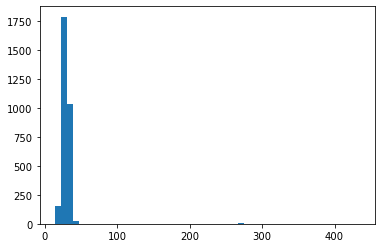

In [60]:
null_obj_amount = ds_obj["train"].BMI.isnull().sum()
# 737 NaN

_ = plt.hist(ds_obj["train"].BMI, bins = 50)

we can see outliers at around 270. BMI cannot be this big. max BMI is around 50 i would say. Every BMI above this would receive an average of the population, since I assume that the measurement is simply incorrect

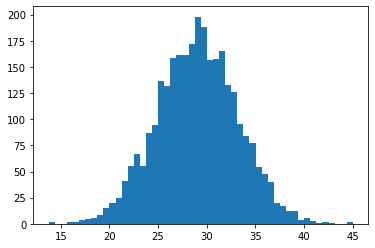

In [83]:
bmi_max_val = 50
mean_train_BMI = np.mean(ds_obj["train"].BMI)
outlier_bmi_mask = ds_obj["train"].BMI>bmi_max_val


ds_obj["train"].loc[outlier_bmi_mask, "BMI"] = mean_train_BMI

_ = plt.hist(ds_obj["train"].BMI, bins = 50)

**TODO**:
It would be better to take mean for the appropriating Age and Sex category, since those are physical parameters as well

# 2. SEX
**should be categorical**

In [92]:
# ds_obj["train"].Sex = ds_obj["train"].Sex.map( {'F':0, 'M':1}).astype(int)

ds_obj["train"].Sex.isnull().sum()

729

what do i do with NaN?.... drop? need to find correlation with some other class

# 3. Expenses
**continuous data**

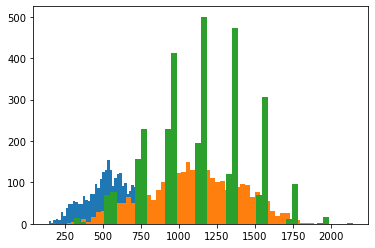

In [105]:
_ = plt.hist(ds_obj["train"].AvgHouseholdExpenseOnPresents, bins = 50)
_ = plt.hist(ds_obj["train"].AvgHouseholdExpenseOnSocialGames, bins = 50)
_ = plt.hist(ds_obj["train"].AvgHouseholdExpenseParkingTicketsPerYear, bins = 50)

# 4. Age group
**should be changed to int**


In [126]:
ds_obj["train"]["AgeGroupInt"] = \
ds_obj["train"]["AgeGroup"].astype('Int64')

In [127]:
ds_obj["train"] = ds_obj["train"].drop(['AgeGroup'], axis=1) 

# 5. PCR results
**let's see if there's correlation between those results. If so, some of those inputs can be dropped out**

we will look at the correlation graphs and at the pearson coefficients

Text(0.5, 1.0, 'Correlation Matrix')

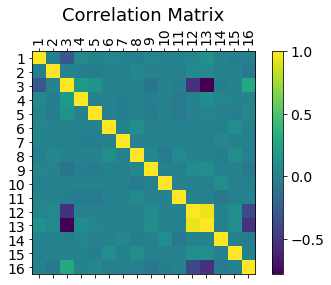

In [141]:
relevant_fields = ["pcrResult" + str(i+1) for i in range(16)]  
ticks_names = [str(i+1) for i in range(16)]  

ds_obj_pcr = ds_obj["train"][relevant_fields]
corr_df = ds_obj_pcr.corr('pearson')

# show as heatmap
f = plt.figure()
plt.matshow(corr_df, fignum=f.number)
plt.xticks(range(16), ticks_names, fontsize=14, rotation = 'vertical')
plt.yticks(range(16), ticks_names, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=18)



conclusions:
1. pcr results 12, 13 are strongly correlated
2. pcr results 3, 13 are strongly negatively correlated
3. pcr results 3, 12 are strongly negatively correlated
3. pcr results 16, 13 are strongly negatively correlated
4. pcr results 16, 12 are strongly negatively correlated

Conclusion:
we can remove the following features: 3, 12, 16. They are strongly correlated with feature 13